# Analyse and Plot an n-tuple saved `parquet` file with ROOT

In [1]:
import ROOT
import pandas as pd

Read the file (as Pandas data frane) and create a RDataFrame instance from it 

In [5]:
pdf = pd.read_parquet('m_H-recoil.parquet') # engine='pyarrow'
rdf = ROOT.RDF.FromPandas(pdf)
rdf.Display().Print()

+-----+----------+---------+----------------+
| Row | Zcand_m  | Zcand_q | Zcand_recoil_m | 
+-----+----------+---------+----------------+
| 0   | 91.9090f | 0       | 126.735f       | 
+-----+----------+---------+----------------+
| 1   | 85.0863f | 0       | 122.907f       | 
+-----+----------+---------+----------------+
| 2   | 87.5668f | 0       | 130.803f       | 
+-----+----------+---------+----------------+
| 3   | 91.4189f | 0       | 139.848f       | 
+-----+----------+---------+----------------+
| 4   | 89.7600f | 0       | 143.035f       | 
+-----+----------+---------+----------------+


## Create the histograms and drow them

In [8]:
# Draw the histograms
h1 = rdf.Histo1D(("Zcand_m", "Z candidate mass;[GeV];N_{Events}", 100, 80, 100), "Zcand_m")
h1.Fit('gaus')
h2 = rdf.Histo1D(("Zcand_recoil_m", "Z candidate recoil mass;[GeV];N_{Events}", 100, 120, 140), "Zcand_recoil_m")
c1 = ROOT.TCanvas()
h1.Draw()
c2 = ROOT.TCanvas()
h2.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      860.398
NDf                       =           97
Edm                       =  7.29944e-07
NCalls                    =           92
Constant                  =      160.987   +/-   4.60763     
Mean                      =      90.9986   +/-   0.032612    
Sigma                     =      2.05567   +/-   0.0494044    	 (limited)


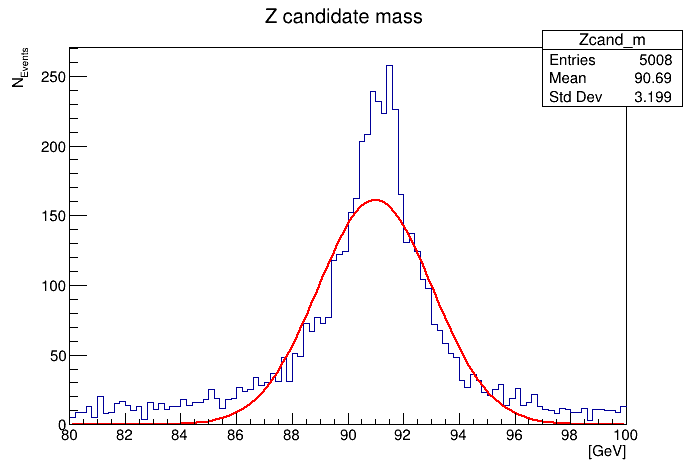

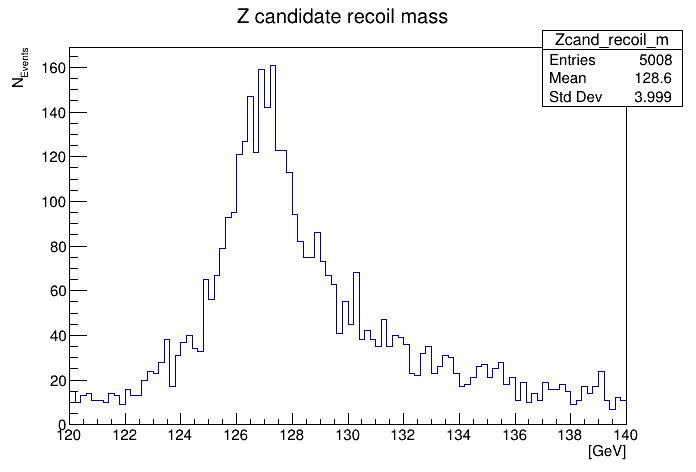

In [9]:
ROOT.gROOT.GetListOfCanvases().Draw()